In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


spaceship = pd.read_csv('train.csv')
spaceship = spaceship.drop('Name', axis=1)
spaceship = spaceship.fillna(method='ffill')
columns_to_convert = ['CryoSleep', 'VIP', 'Transported']
spaceship[columns_to_convert] = spaceship[columns_to_convert].astype(int)
spaceship['HomePlanet'] = spaceship['HomePlanet'].replace({'Europa': 0, 'Earth': 1, 'Mars': 2})
spaceship['Destination'] = spaceship['Destination'].replace({'TRAPPIST-1e': 0, 'PSO J318.5-22': 1, '55 Cancri e': 2})

# Create a LabelEncoder object
label_encoder = LabelEncoder()
spaceship['Cabin'] = label_encoder.fit_transform(spaceship['Cabin'])

spaceship


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,0,0,149,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0002_01,1,0,2184,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,0003_01,0,0,1,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,0003_02,0,0,1,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0004_01,1,0,2186,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,0,146,2,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0
8689,9278_01,1,1,5280,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0
8690,9279_01,1,0,5285,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1
8691,9280_01,0,0,2131,2,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0


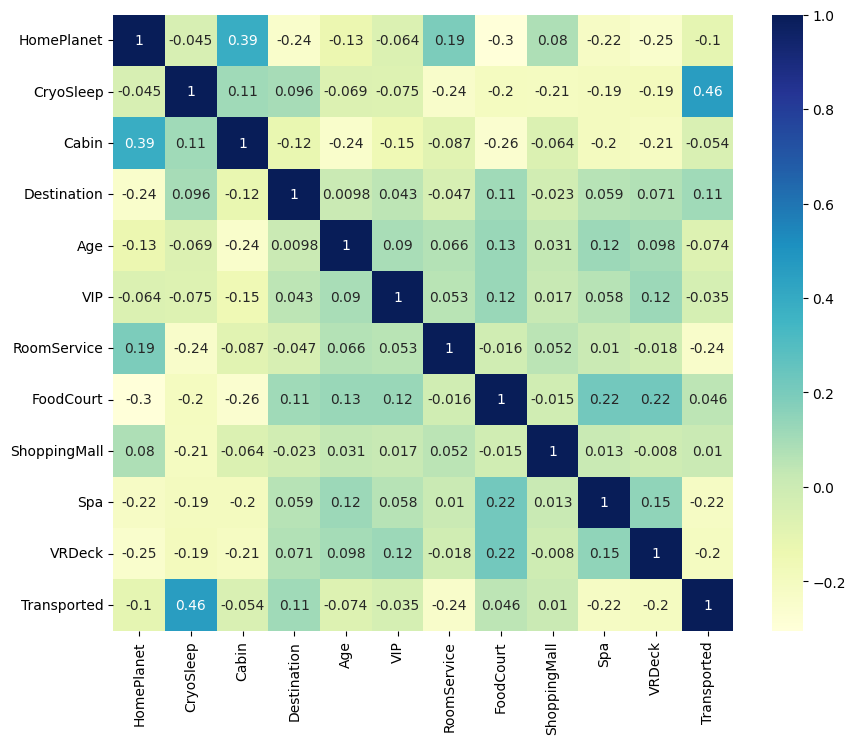

In [66]:
int_columns = spaceship.select_dtypes(include=np.number)
int_df = spaceship[int_columns.columns]

correlation_matrix = int_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.show()


In [68]:
X = spaceship.iloc[:, :-1]
y = spaceship.iloc[:, -1]

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [70]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier()

In [71]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [72]:
clf.feature_importances_

array([0.12653145, 0.03268184, 0.10103278, 0.16547955, 0.01955513,
       0.11043778, 0.00197735, 0.0938191 , 0.08334738, 0.06687317,
       0.10987286, 0.08839159])

In [76]:
spaceship_test = pd.read_csv('test.csv')
spaceship_test = spaceship_test.drop('Name', axis=1)
spaceship_test = spaceship_test.fillna(method='ffill')
columns_to_convert = ['CryoSleep', 'VIP']
spaceship_test[columns_to_convert] = spaceship_test[columns_to_convert].astype(int)
spaceship_test['HomePlanet'] = spaceship_test['HomePlanet'].replace({'Europa': 0, 'Earth': 1, 'Mars': 2})
spaceship_test['Destination'] = spaceship_test['Destination'].replace({'TRAPPIST-1e': 0, 'PSO J318.5-22': 1, '55 Cancri e': 2})

# Create a LabelEncoder object
label_encoder = LabelEncoder()
spaceship_test['Cabin'] = label_encoder.fit_transform(spaceship_test['Cabin'])

spaceship_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,1,1,2784,0,27.0,0,0.0,0.0,0.0,0.0,0.0
1,0018_01,1,0,1867,0,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,0019_01,0,1,257,2,31.0,0,0.0,0.0,0.0,0.0,0.0
3,0021_01,0,0,259,0,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,0023_01,1,0,1940,0,20.0,0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,1,2679,0,34.0,0,0.0,0.0,0.0,0.0,0.0
4273,9269_01,1,0,2679,0,42.0,0,0.0,847.0,17.0,10.0,144.0
4274,9271_01,2,1,602,2,42.0,0,0.0,0.0,0.0,0.0,0.0
4275,9273_01,0,0,603,2,42.0,0,0.0,2680.0,0.0,0.0,523.0


In [84]:
y_pred = clf.predict(spaceship_test)


In [88]:
y_pred
# Convert 0s and 1s to False and True
y_pred_bool = y_pred.astype(bool)
y_pred_bool

array([ True, False,  True, ...,  True,  True,  True])

In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[857, 225],
       [252, 840]], dtype=int64)

In [89]:
final_df = pd.DataFrame(spaceship_test['PassengerId'])
final_df['Transported'] = y_pred_bool
final_df.to_csv('spaceshippred.csv', index = False )

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,0
...,...,...
4272,9266_02,1
4273,9269_01,0
4274,9271_01,1
4275,9273_01,1
